<a href="https://colab.research.google.com/github/UserMarcos/Master_IA/blob/main/07MIAR_Proyecto_Programacion_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


Enlace al fichero en colab:

https://colab.research.google.com/drive/17nJT7hfp3YMYDdNfeUhyH0fDmHd7WzX-?usp=sharing

Enlace de Github:

https://github.com/UserMarcos/Master_IA/blob/main/07MIAR_Proyecto_Programacion_Redes_Neuronales.ipynb

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Carga de datos desde la plataforma Kaggle

In [2]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [3]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.8-py3-none-any.whl size=111962 sha256=0ebbe92153debb95b6d63b46a9cc6ec7f3fc084ab7655e04e4435d9ffdcc38f7
  Stored in directory: /root/.cache/pip/wheels/b3/86/2d/2df535a84838c858ca91a03805f9c3131573c8e777fd907689
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [1]:
#%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          19938        400  0.9411765        
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1703         35  1.0              
m1relly/heart-attack-prediction                             Heart Attack Prediction                        519KB  2024-04-01 18:17:52            993         24  1.0              
jatinthakur706/most-watched-netflix-original-shows-tv-time  Most watched Netflix original shows (TV Time)

#### Descarga del __Dataset__ de los pájaros

In [4]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

100% 1.95G/1.96G [00:29<00:00, 43.3MB/s]
100% 1.96G/1.96G [00:29<00:00, 70.7MB/s]


In [5]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [6]:
# Descomprimimos los datos y los dejamos listos para trabajar
%%capture
!unzip 100-bird-species.zip -d my_dataset

In [10]:
#!unzip my_dataset/test.zip

In [7]:
#%%capture
!ls

100-bird-species.zip  kaggle.json  my_dataset  sample_data


## Carga a un _dataframe_
Cargamos en un _dataframe_ el fichero "my_dataset/birds.csv" y analizamos un poco los datos.

In [10]:
import pandas as pd
df = pd.read_csv("my_dataset/birds.csv")
display(df.sample(10))

#display(df[df["labels"]=="TAWNY FROGMOUTH"])

#print(df["labels"][0])
print("Numero de elementos:" ,len(df))

NDatos = df['data set'].value_counts()
print("Número del conjunto train:", NDatos['train'])
print("Número del conjunto valid:", NDatos['valid'])
print("Número del conjunto test:", NDatos['test'])
#print(df['data set'].value_counts())

# Cantidad de tipos de pájaros
nEspecies = df.nunique()['labels']
print("Número de especies:", nEspecies)

,class id,filepaths,labels,data set,scientific name
29733,187.0,train/DOUBLE BARRED FINCH/025.jpg,DOUBLE BARRED FINCH,train,TAENIOPYGIA BICHENOVII
23293,147.0,train/CLARKS GREBE/028.jpg,CLARKS GREBE,train,AECHMOPHORUS CLARKII
50106,316.0,train/KOOKABURRA/041.jpg,KOOKABURRA,train,DACELO
17306,109.0,train/BROWN NOODY/083.jpg,BROWN NOODY,train,ANOUS STOLIDUS
72332,451.0,train/SPOTTED WHISTLING DUCK/149.jpg,SPOTTED WHISTLING DUCK,train,DENDROCYGNA GUTTATA
60960,382.0,train/POMARINE JAEGER/140.jpg,POMARINE JAEGER,train,STERCORARIUS POMARINUS
37144,234.0,train/GO AWAY BIRD/033.jpg,GO AWAY BIRD,train,CORYTHAIXOIDES CONCOLOR
34873,220.0,train/FASCIATED WREN/058.jpg,FASCIATED WREN,train,CAMPYLORHYNCHUS FASCIATUS
68535,428.0,train/SAMATRAN THRUSH/034.jpg,SAMATRAN THRUSH,train,MYOPHONUS CASTANEUS
54902,345.0,train/MYNA/107.jpg,MYNA,train,ACRIDOTHERES TRISTIS


Numero de elementos: 89885
Número del conjunto train: 84635
Número del conjunto valid: 2625
Número del conjunto test: 2625
Número de especies: 525


Mostramos una imagen aleatoria de ejemplo.

Ejemplo de imagen: my_dataset/train/JANDAYA PARAKEET/133.jpg; Especie : JANDAYA PARAKEET
Tamaño de imagen: (224, 224, 3)


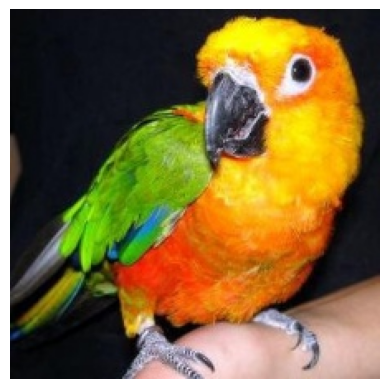

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Escogiendo y mostrando una imagen al azar del dataframe
idx = np.random.randint(0, len(df)-1)
Ruta = 'my_dataset/'+df["filepaths"][idx]
Label = df["labels"][idx]
print("Ejemplo de imagen: " + Ruta + "; Especie : " + Label)
img = cv2.imread(Ruta, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)

print("Tamaño de imagen:", img.shape)

Creamos los generadores de imagenes desde el _dataframe_.

Found 84480 validated image filenames belonging to 524 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 155 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Found 2620 validated image filenames belonging to 524 classes.
Found 2620 validated image filenames belonging to 524 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


<class 'keras.src.preprocessing.image.DataFrameIterator'>
84480
<built-in method count of list object at 0x7e99230f9840>
Tamaño de las imágenes generadas: (224, 224, 3)


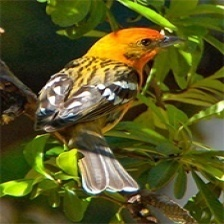

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train_datagen = ImageDataGenerator(rescale=1./255 )
train_flow = train_datagen.flow_from_dataframe(df[df['data set']=='train'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=(img.shape[0], img.shape[1]))
valid_flow = train_datagen.flow_from_dataframe(df[df['data set']=='valid'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=(img.shape[0], img.shape[1]))
test_flow = train_datagen.flow_from_dataframe(df[df['data set']=='test'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=(img.shape[0], img.shape[1]))

V = train_flow[0][0][0]

print(type(train_flow))
print(train_flow.n)
print("Tamaño de las imágenes generadas:", V.shape)


image.array_to_img(V)
#print(image.shape)

#### Tareas pendientes !!!!!!!!!!!!!!!!!!!!
- Ver porque aparece el _warning_ que dice que alguna de las rutas a imágenes que hay en el _dataframe_ no son válidas en el código anterior.
- Porque pone que hay _524 classes_ y en el dataframe hay 525 especies diferentes.

### Estructura de la red

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Definimos layer de entreda
input = layers.Input(shape=(V.shape[0], V.shape[1], V.shape[2]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)

# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)

# Bloque 3
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x3)
predictions = layers.Dense(nEspecies-1, activation="softmax")(gap)

# 3. Unimos las entradas y salidas del modelo
convnet_aug = Model(inputs=input, outputs=predictions)
convnet_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_7 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0   

In [ ]:
# Definicion de hiperparametros
batch_size=128
learning_rate=0.001
epochs=50

# Compilamos el modelo - modificamos loss para tener en cuenta ohe
convnet_aug.compile(optimizer=Adam(learning_rate=learning_rate),
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])


H = convnet_aug.fit(train_flow,
                    epochs=epochs,
                    steps_per_epoch=train_flow.n // batch_size,
                    validation_data=valid_flow)


Epoch 1/50
 54/660 [=>............................] - ETA: 3:25:18 - loss: 6.2501 - accuracy: 0.0069